In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os



In [2]:
#download the dataset
mnist_dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")


In [3]:
#loading the data into training and testing, training =60k, testing = 10k
(x_train,y_train),(x_test,y_test) = mnist_dataset

In [4]:
#understanding the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

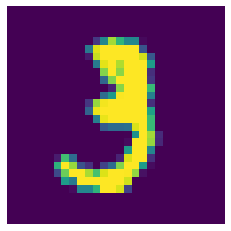

In [5]:
plt.imshow(x_train[10])
plt.axis('off')

In [6]:
y_train[10]

3

In [7]:
#normalize the data: for RGB range = 0-255
x_train = x_train/255.0
x_test = x_test/255.0


In [8]:
#creating the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                  tf.keras.layers.Dense(128,activation = 'relu'),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])


In [9]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
#training the model
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1294 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0827 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0634 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9879


In [11]:
#evaluating the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 960us/step - loss: 0.0687 - accuracy: 0.9787
[0.068744957447052, 0.9786999821662903]


7
2
1
0
4
1
4
9
5


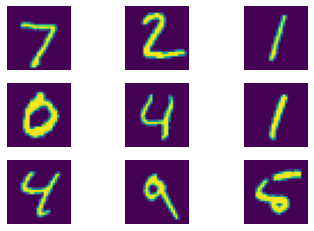

In [12]:
#checking out how our machine have learned by comparing first ten test values and predicted values
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    
prediction = model.predict(x_test)
for i in range(9):
    print(np.argmax(prediction[i]))
    